# Análisis de la ecuación de Laplace inciso a

La solución de la ecuación 
$$\frac{\partial^2 u}{\partial y^2} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(1,y)=0, \;\;\; 0<y<1$$
Y la condición inicial:
$$u(x,0)=100,\; u(x,1)=200\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\sum_{n=1}^{\infty} (A_ncosh(n\pi y)+B_nsenh(n\pi y))sen(n\pi x)$$

El problema se elabora con dos soluciones $u_1$ y $u_2$ que serán sumadas al final para obtener $u(x,y)$

In [452]:
from pylab import *
import math

Para empezar, graficamos las dos condiciones iniciales.

In [453]:
def con_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 200
    return y

def con_0(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 100
    return y

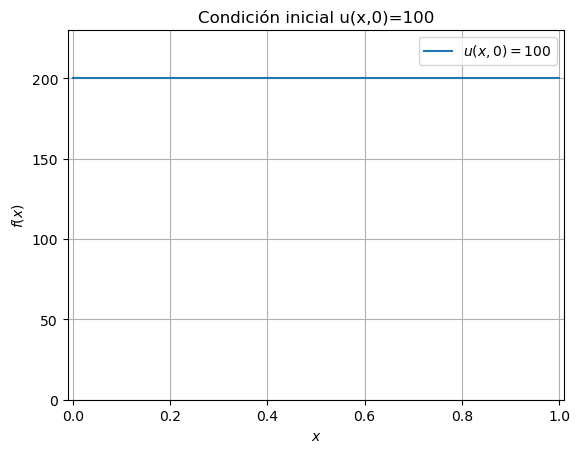

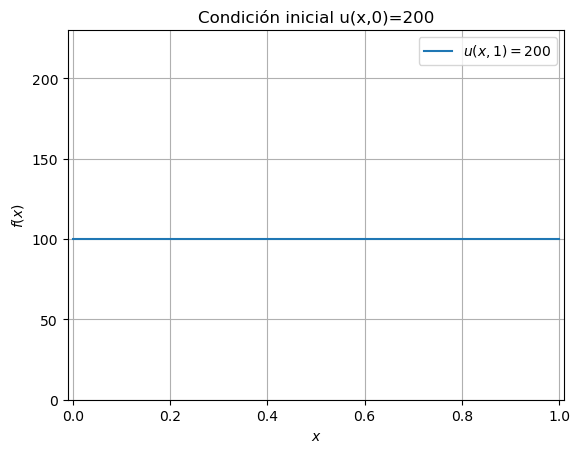

In [454]:
x = linspace(0,1,1000)
f = con_1(x)
plot(x,f,label='$u(x,0)=100$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial u(x,0)=100")
xlim([-0.01,1.01]),ylim([-0.01,230.01]),grid(),legend()
show()

x = linspace(0,1,1000)
g = con_0(x)
plot(x,g,label='$u(x,1)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial u(x,0)=200")
xlim([-0.01,1.01]),ylim([-0.01,230.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=100$ y tambien $u(x,1)=200$.

In [555]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-(-1)**n)*sin(n*pi*x)/(n*pi)
    return 400*f

def u_1(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-(-1)**n)/(n*pi)*sin(n*pi*x)
    return 200*f

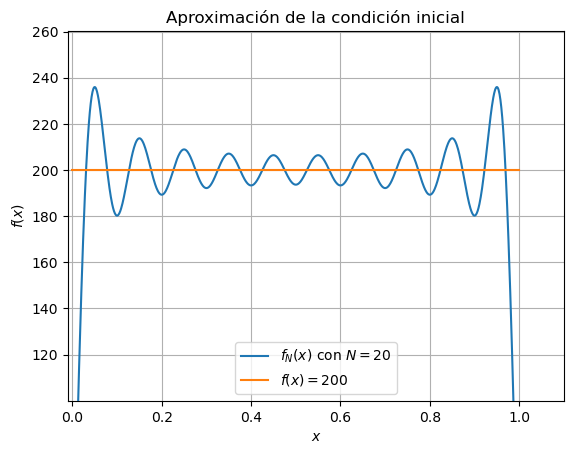

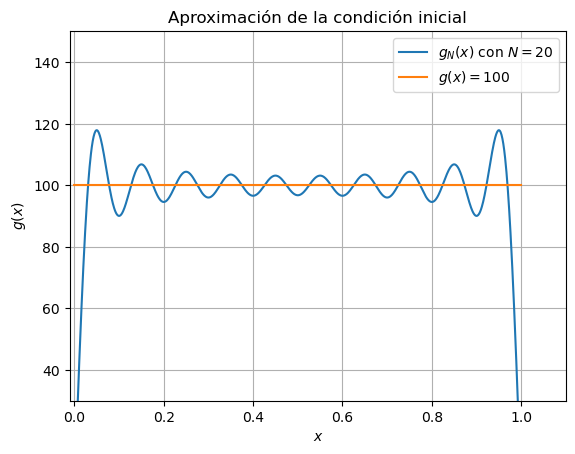

In [563]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([100.01,260.2]),grid(),legend()
show()

g_n = u_1(x)
plot(x,g_n,label='$g_N(x)$ con $N=20$')
plot(x,g,label='$g(x)=100$')
plt.xlabel('$x$'); plt.ylabel('$g(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([30.01,150.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

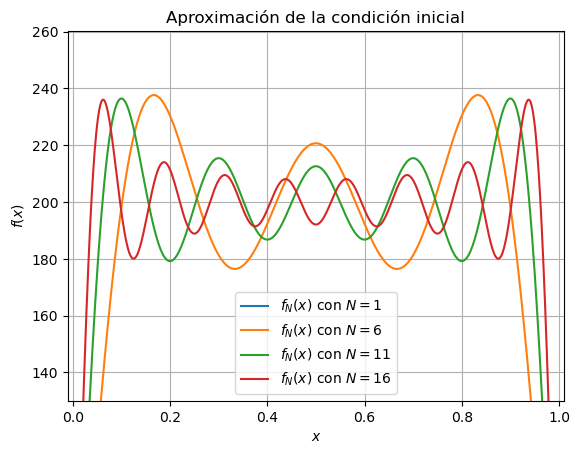

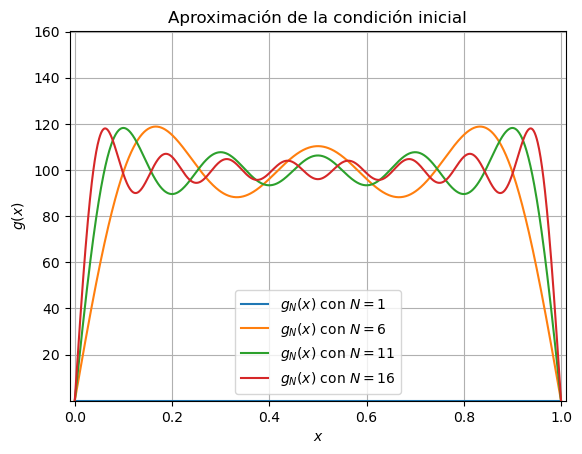

In [570]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([130.01,260.2]),grid(),legend()
show()

for i in range(1,20,5):
    plot(x,u_1(x,i),label='$g_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$g(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([0.01,160.2]),grid(),legend()
show()

In [565]:
def u_x_y(x,y,N=20):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += (1-(-1)**n)*sin(n*pi*x)/(sinh(n*pi)*n)*sinh(n*pi*y[i])                
    return 400/pi*f

def u_x_y_2(x,y,N=20):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += 200.0*(1.0-cos(n*pi))*(cosh(n*pi*y[i]) + ((2.0 - cosh(n*pi))/sinh(n*pi))*sinh(n*pi*y[i]))*sin(n*pi*x)/(n*pi)   
    return f


In [566]:
x = linspace(0,1,1000)
y_1 = linspace(1,1,1000)
y_2 = linspace(0,1,1000)
U_1 = u_x_y(x,y_1)
U_2 = u_x_y_2(x,y_2)

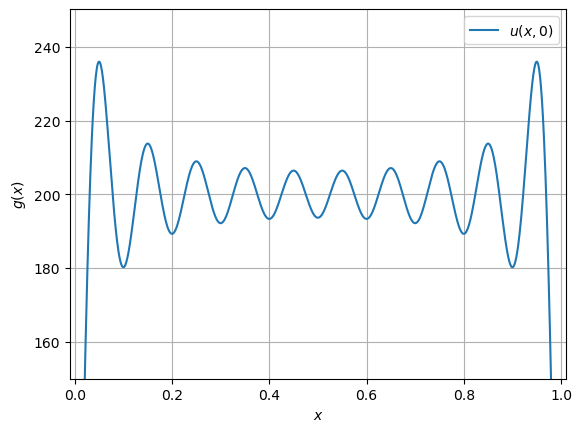

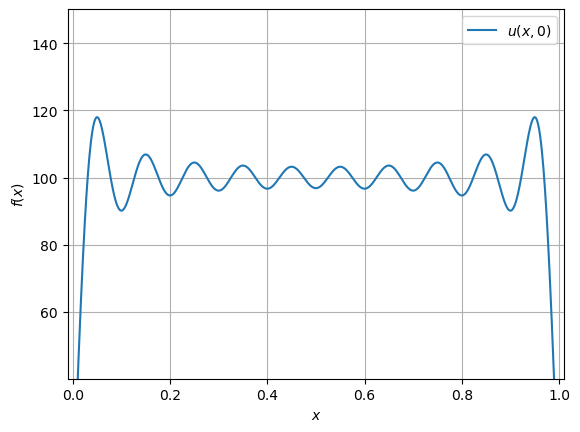

In [571]:
plot(x,U_1[:,1],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$g(x)$'); 
# plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([150.01,250.2]),grid(),legend()
show()

plot(x,U_2[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
# plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([40.01,150.2]),grid(),legend()
show()


Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

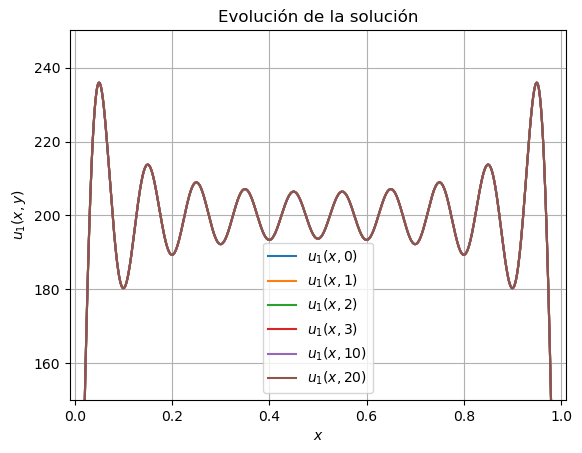

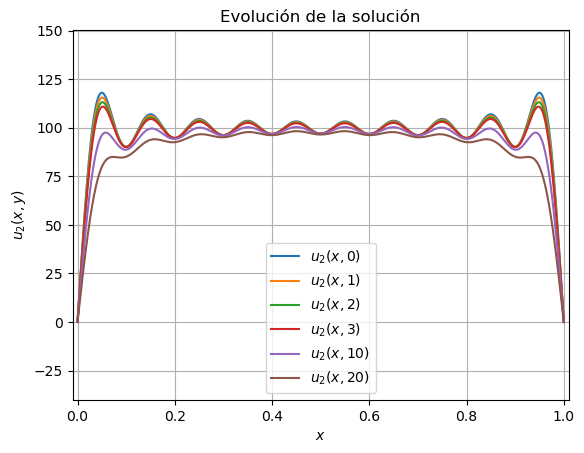

In [574]:
plot(x,U_1[:,0],label='$u_1(x,0)$') # Mejorar
plot(x,U_1[:,1],label='$u_1(x,1)$')
plot(x,U_1[:,2],label='$u_1(x,2)$')
plot(x,U_1[:,3],label='$u_1(x,3)$')
plot(x,U_1[:,10],label='$u_1(x,10)$')
plot(x,U_1[:,20],label='$u_1(x,20)$')
plt.xlabel('$x$'); plt.ylabel('$u_1(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([150.01,250.2]),grid(),legend()
show()

plot(x,U_2[:,0],label='$u_2(x,0)$') # Mejorar
plot(x,U_2[:,1],label='$u_2(x,1)$')
plot(x,U_2[:,2],label='$u_2(x,2)$')
plot(x,U_2[:,3],label='$u_2(x,3)$')
plot(x,U_2[:,10],label='$u_2(x,10)$')
plot(x,U_2[:,20],label='$u_2(x,20)$')
plt.xlabel('$x$'); plt.ylabel('$u_2(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-40.01,150.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

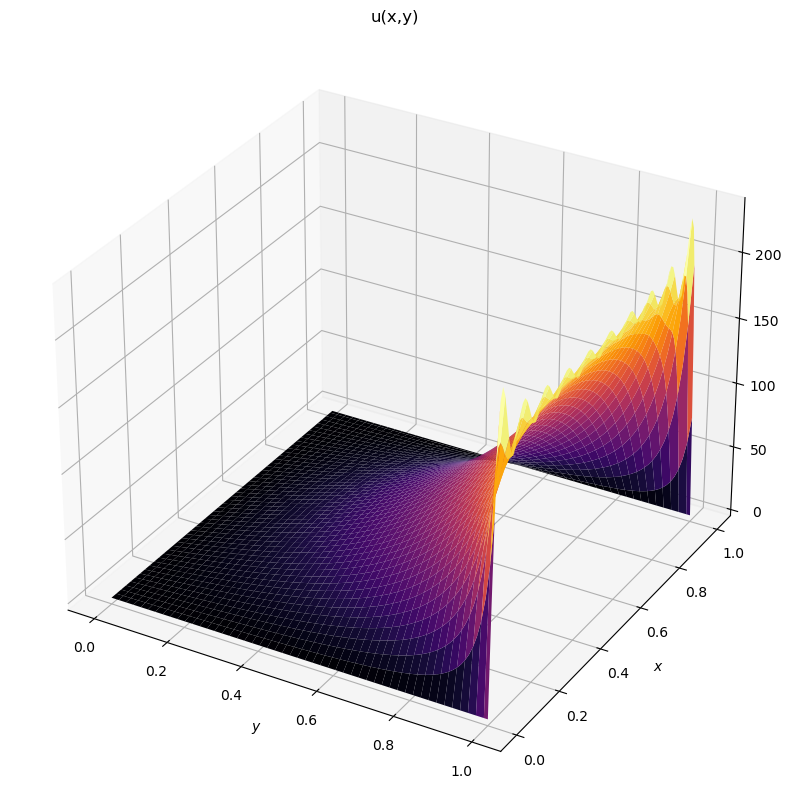

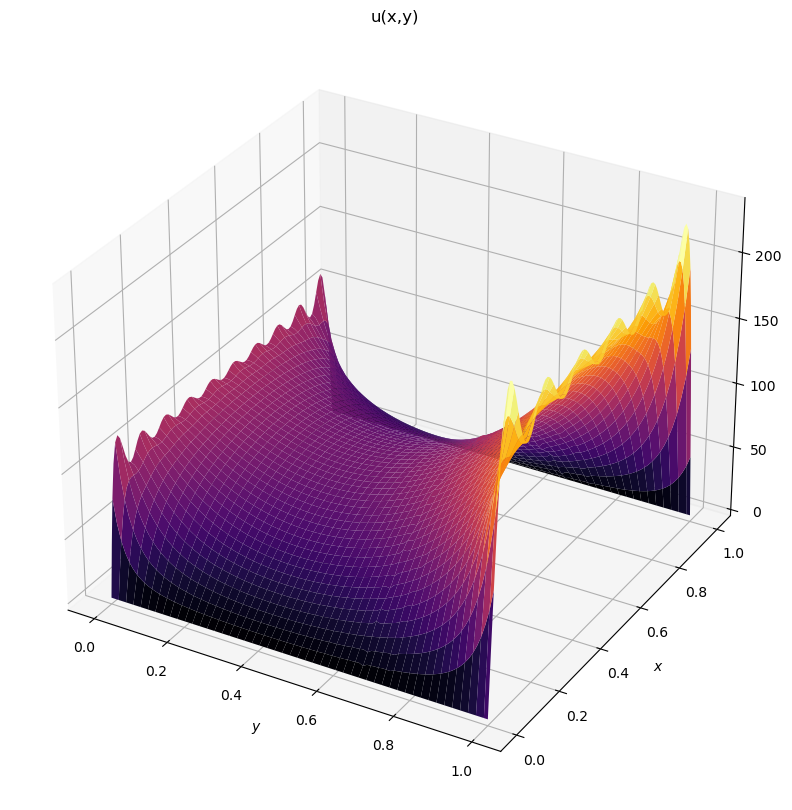

In [576]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U_1= u_x_y(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U_1, cmap="inferno"); #Otros colores:"viridi#%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D
fig_2 = plt.figure(figsize=(12,10))
ax_2 = fig_2.add_subplot(111, projection="3d")

x_1 = linspace(0,1.0,100)
y_1 = linspace(0,1.0,100)

X_1,Y_1 = np.meshgrid(y_1,x_1)

U_2 = u_x_y_2(x_1,y_1)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax_2.plot_surface(X_1, Y_1, U_2, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"s", "inferno", "plasma"

